## A*算法求解最短路径

In [2]:
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt

#### 启发函数：计算当前点到终点的欧式距离（8个邻居）

In [4]:
def heuristic(pos, end):
    return math.sqrt((end[0]-pos[0])**2 + (end[1]-pos[1])**2)

#### A*算法主函数
**参数：**
- grid:  
  - 类型: 二维数组  
  - 说明: 网格地图，`0` 表示可通行区域，`1` 表示障碍物  
- start:  
  - 类型: tuple  
  - 说明: 起始坐标，格式为 `(x, y)`  
- end:  
  - 类型: tuple  
  - 说明: 终点坐标，格式为 `(x, y)`    

**返回：**
- path:  
  - 类型: 列表（包含 tuple）或 `None`  
  - 说明: 从起点到终点的路径坐标列表（若存在路径），若路径不存在则返回 `None`  

In [6]:
def astar(grid, start, end):
    # 获取网格的行数和列数
    rows = len(grid)
    cols = len(grid[0]) if rows > 0 else 0
    
    # 定义八个移动方向（包括对角线方向）
    directions = [(-1,-1), (-1,0), (-1,1),
                  (0,-1),          (0,1),
                  (1,-1),  (1,0), (1,1)]
    
    # 初始化优先队列（开放列表），元素格式为 (f值, g值, x坐标, y坐标)
    open_heap = []
    heapq.heappush(open_heap, (heuristic(start, end), 0, start[0], start[1]))
    
    # g_scores记录从起点到各节点的实际代价
    g_scores = {start: 0}  
    # came_from记录节点的前驱节点，用于路径回溯
    came_from = {}          
    
    # 主循环，处理开放列表中的节点
    while open_heap:
        # 取出当前f值最小的节点
        current_f, current_g, x, y = heapq.heappop(open_heap)
        current_pos = (x, y)
        
        # 若到达终点，重构并返回路径
        if current_pos == end:
            path = []
            # 通过前驱节点回溯路径
            while current_pos in came_from:
                path.append(current_pos)
                current_pos = came_from[current_pos]
            path.append(start)  # 添加起点
            path.reverse()      # 反转得到从起点到终点的路径
            return path, current_g
        
        # 如果当前节点的g值已不是最小，说明已有更优路径，跳过处理
        if current_g > g_scores.get(current_pos, float('inf')):
            continue
        
        # 遍历所有可能移动方向
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            # 检查新坐标是否在网格范围内且可通行
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 0:
                # 计算移动代价：对角线移动为√2，直线移动为1
                move_cost = math.sqrt(2) if dx and dy else 1
                tentative_g = current_g + move_cost  # 暂定g值
                neighbor_pos = (nx, ny)
                
                # 如果新路径比已知路径更优
                if tentative_g < g_scores.get(neighbor_pos, float('inf')):
                    came_from[neighbor_pos] = current_pos  # 记录前驱节点
                    g_scores[neighbor_pos] = tentative_g  # 更新g值
                    # 计算f值（g值 + 启发式估计值）并加入开放列表
                    f = tentative_g + heuristic(neighbor_pos, end)
                    heapq.heappush(open_heap, (f, tentative_g, nx, ny))
    
    # 开放列表耗尽仍未找到终点，返回None
    return None

#### 输入数据

In [8]:
input_data = """
0000000010000000000000000000100000000000
000S000010000001000000000000100000010000
0000000010000001110000000000100000011100
0000001011111100010000000010111111000100
0000000001000100000000000000010001000000
0000000001000101110000000000010001011100
0000000000000000000000000000000000000000
0111100000000000000000000000000000000000
0000000000000000000000000000000011111111
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000011111111100000000000000
00000111111111000001111111110000000000E0
"""

#### 解析输入数据为二维数组，并定位起点(S)和终点(E)

In [10]:
rows = [line.strip() for line in input_data.split('\n') if line.strip()]
start = None
end = None
map_data = []

for i, row in enumerate(rows):
    map_row = []
    for j, char in enumerate(row):
        if char == 'S':
            start = (i, j)      # 记录起点坐标（行，列）
            map_row.append(0)   # 起点位置设为可通行
        elif char == 'E':
            end = (i, j)        # 记录终点坐标
            map_row.append(0)   # 终点位置设为可通行
        else:
            # 将字符转换为0（可通行）或1（障碍）
            map_row.append(0 if char in ('0', 'S', 'E') else 1)
    map_data.append(map_row)

#### 运行A*算法

In [12]:
result = astar(map_data, start, end)

#### 输出结果

In [14]:
if result:
    path, path_length = result
    print(f"最短路径长度：{path_length:.2f}")
    print("最短路径坐标：")
    for p in path:
        print(p)
else:
    print("没有找到路径")

最短路径长度：39.56
最短路径坐标：
(1, 3)
(2, 4)
(3, 5)
(4, 6)
(4, 7)
(5, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(6, 21)
(6, 22)
(6, 23)
(6, 24)
(6, 25)
(7, 26)
(7, 27)
(7, 28)
(8, 29)
(8, 30)
(8, 31)
(9, 32)
(10, 33)
(10, 34)
(11, 35)
(11, 36)
(11, 37)
(12, 38)


#### 数据可视化

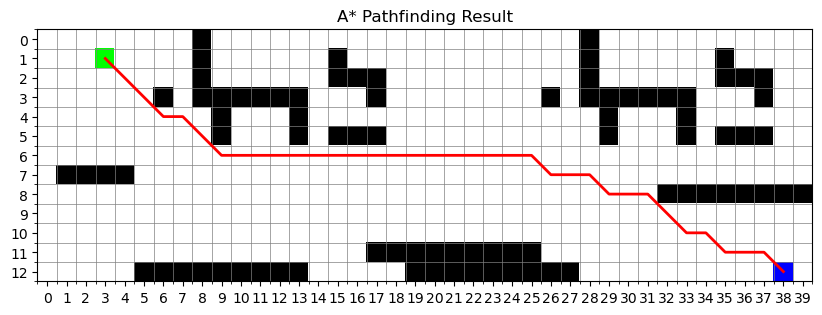

In [16]:
# 设置颜色
grid = np.array(map_data)
image = np.ones((grid.shape[0], grid.shape[1], 3))  # 创建白色背景

image[grid == 1] = [0, 0, 0]  # 设置障碍为黑色

# 标记起点和终点
if start:
    image[start[0], start[1]] = [0, 1, 0]  # 起点绿色
if end:
    image[end[0], end[1]] = [0, 0, 1]  # 终点蓝色

plt.figure(figsize=(10, 10))
plt.imshow(image, interpolation='nearest')
plt.xticks(range(grid.shape[1]))
plt.yticks(range(grid.shape[0]))

# 添加网格线
plt.gca().set_xticks([x - 0.5 for x in range(grid.shape[1]+1)], minor=True)
plt.gca().set_yticks([y - 0.5 for y in range(grid.shape[0]+1)], minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

# 绘制路径
if path:
    # 提取路径点的列索引作为x坐标，行索引作为y坐标
    x_coords = [y for (x, y) in path]
    y_coords = [x for (x, y) in path]
    plt.plot(x_coords, y_coords, color='red', linewidth=2)  # 用红色直线连接路径点

plt.title("A* Pathfinding Result")
plt.show()